In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import sklearn
import keras
from mpl_toolkits import mplot3d

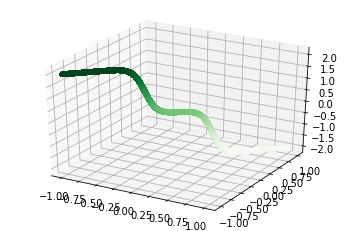

In [2]:
x_data1 = np.linspace(-1, 1, num=100000)
y_data1 = np.linspace(-1, 1, num=100000)
z_data1 = - np.tanh(10*x_data1-3) - np.tanh(10*y_data1+3)
ax = plt.axes(projection='3d')
ax.scatter3D(x_data1, y_data1, z_data1, c=z_data1, cmap='Greens');


In [3]:
data = []
for i in range(0,len(x_data1)):
  data.append([x_data1[i],y_data1[i], z_data1[i]])

np.random.shuffle(data)
x_data = []
y_data = []
z_data = []

for i in data:
  x_data.append(i[0])
  y_data.append(i[1])
  z_data.append(i[2])

x_train = x_data[:len(x_data) - len(x_data)//10]
x_test = x_data[len(x_data) - len(x_data)//10:]
print(len(x_train),len(x_test))

y_train = y_data[:len(y_data) - len(y_data)//10]
y_test = y_data[len(y_data) - len(y_data)//10:]
print(len(y_train),len(y_test))

z_train =z_data[:len(z_data) - len(z_data)//10]
z_test = z_data[len(z_data) - len(z_data)//10:]
print(len(z_train),len(z_test))

90000 10000
90000 10000
90000 10000


In [21]:
model = keras.Sequential()
model.add(keras.layers.Dense(units = 1, activation = 'linear', input_shape=(2,)))
model.add(keras.layers.Dense(units = 64, activation = 'relu'))
model.add(keras.layers.Dense(units = 64, activation = 'relu'))
model.add(keras.layers.Dense(units = 1, activation = 'linear'))
model.compile(loss='mse', optimizer="adam")
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 1)                 3         
_________________________________________________________________
dense_25 (Dense)             (None, 64)                128       
_________________________________________________________________
dense_26 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 65        
Total params: 4,356
Trainable params: 4,356
Non-trainable params: 0
_________________________________________________________________


In [22]:
training_data = []
for i in range(0,len(x_train)):
  training_data.append([x_train[i],y_train[i]])


In [23]:
model.fit(training_data, z_train, epochs=100, verbose=1)

Epoch 1/100
2813/2813 [==============================] - 3s 1ms/step - loss: 0.0426
Epoch 2/100
2813/2813 [==============================] - 3s 1ms/step - loss: 1.0973e-05
Epoch 3/100
2813/2813 [==============================] - 3s 1ms/step - loss: 2.8610e-05
Epoch 4/100
2813/2813 [==============================] - 3s 1ms/step - loss: 3.6165e-05
Epoch 5/100
2813/2813 [==============================] - 3s 1ms/step - loss: 3.8443e-05
Epoch 6/100
2813/2813 [==============================] - 3s 1ms/step - loss: 3.4416e-05
Epoch 7/100
2813/2813 [==============================] - 3s 1ms/step - loss: 3.3779e-05
Epoch 8/100
2813/2813 [==============================] - 3s 1ms/step - loss: 4.2037e-05
Epoch 9/100
2813/2813 [==============================] - 3s 1ms/step - loss: 2.6205e-05
Epoch 10/100
2813/2813 [==============================] - 3s 1ms/step - loss: 2.7983e-05
Epoch 11/100
2813/2813 [==============================] - 3s 1ms/step - loss: 3.1623e-05
Epoch 12/100
2813/2813 [==========

In [24]:
testing_data = []
for i in range(0,len(x_test)):
  testing_data.append([x_test[i],y_test[i]])


z_predicted = model.predict(testing_data)


from sklearn.metrics import mean_squared_error 

mean_squared_error(z_test,z_predicted) 

2.283862965396333e-06